# Αναγνώριση προτύπων

* Χατζηθεοδώρου Ιάσων 03117089
* Κουνούδης Δημήτρης

## Εργαστήριο 1

### Προπαρασκευή

In [42]:
%matplotlib inline

import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

import numpy as np
import matplotlib.pyplot as plt

import lib
import importlib

In [43]:
importlib.reload(lib)

<module 'lib' from '/home/jason/PatRec/Lab1/lib.py'>

#### Βήμα 1

In [44]:
def read_data_to_array(file):
  with open(file) as f:
    rawdata = f.readlines()
  data = [list(map(lambda x: float(x), row.split())) for row in rawdata]
  return np.array(data)

train = read_data_to_array('train.txt')
test = read_data_to_array('test.txt')

X_train = train[:, 1:]
X_test = test[:, 1:]
y_train = np.array([int(row[0]) for row in train])
y_test = np.array([int(row[0]) for row in test])

#### Βήμα 2

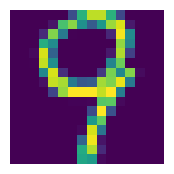

In [45]:
plt.figure(figsize = (2, 2))
lib.show_sample(X_train, 131)
plt.show()

#### Βήμα 3

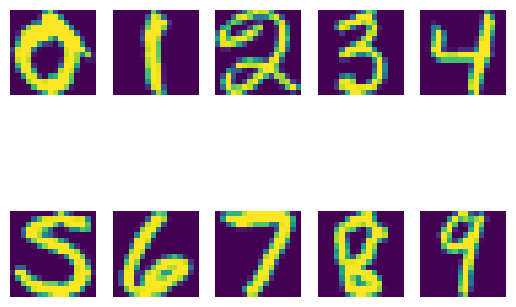

In [46]:
lib.plot_digits_samples(X_train, y_train)
plt.show()

#### Βήμα 4

In [47]:
lib.digit_mean_at_pixel(X_train, y_train, 0, (10, 10))

-0.5041884422110553

#### Βήμα 5

In [48]:
lib.digit_variance_at_pixel(X_train, y_train, 0, (10, 10))

0.5249618093885184

#### Βήμα 6

In [49]:
print(lib.digit_mean(X_train, y_train, 0))
print(lib.digit_variance(X_train, y_train, 0))

[-0.99862814 -0.99539782 -0.98492295 -0.94125126 -0.83334255 -0.57142295
 -0.13158459  0.15260804  0.04628392 -0.35370101 -0.74124874 -0.92091625
 -0.98502513 -0.99718258 -0.99993467 -0.99823451 -0.99346566 -0.94997069
 -0.81149414 -0.48957538  0.06171608  0.5263928   0.6825      0.63088945
  0.39957621 -0.04891709 -0.57936348 -0.87249162 -0.96911139 -0.99679983
 -0.99668174 -0.9728727  -0.86339531 -0.56290285 -0.05700168  0.43772194
  0.6278526   0.61645645  0.5500134   0.51951173  0.37973953 -0.06139782
 -0.56568928 -0.87724791 -0.97848995 -0.99374539 -0.93143049 -0.68924623
 -0.21849832  0.29654858  0.5375134   0.44771859  0.21163149  0.0910134
  0.21372362  0.39326382  0.26515327 -0.17200921 -0.64877387 -0.92078308
 -0.97799246 -0.82162228 -0.41924121  0.09449414  0.46405611  0.44884757
  0.13969012 -0.18907538 -0.39019849 -0.23883166  0.11324456  0.3130067
  0.12591374 -0.3365402  -0.76123116 -0.94678392 -0.62979229 -0.14879397
  0.30968174  0.46998325  0.23364992 -0.18668425 -0.5

### Εργαστηριακό μέρος